Суммарная выручка за 10 дней после релиза составила 37394.0


Text(0, 0.5, 'Выручка')

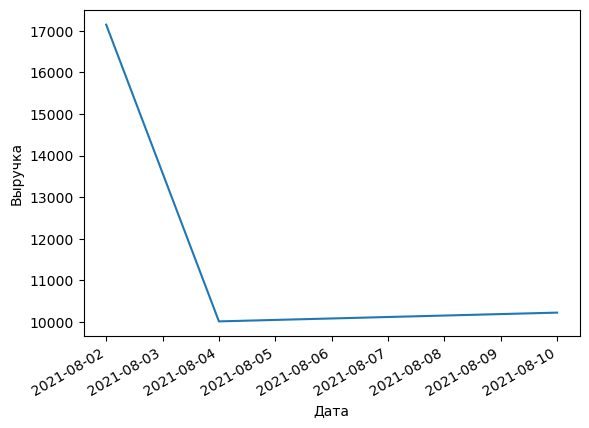

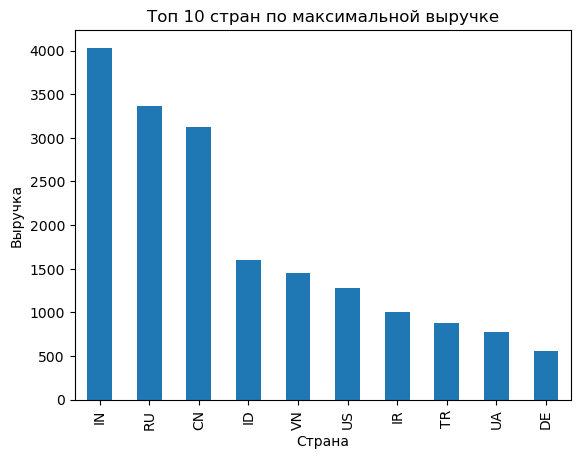

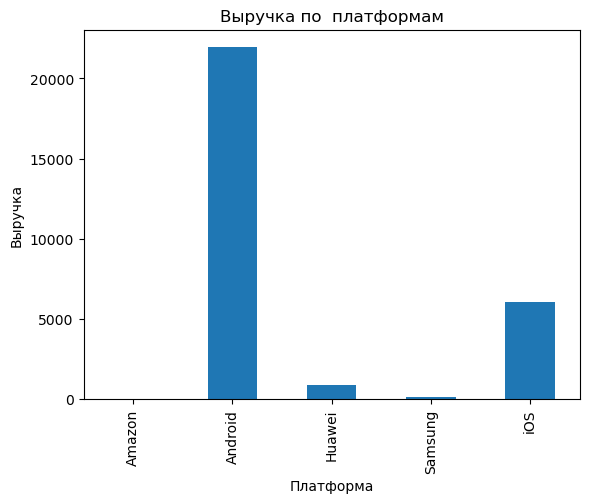

In [480]:
import pandas as pd
import matplotlib.pyplot as plt
df_logins = pd.read_csv('logins.csv')
df_payments = pd.read_csv('payments.csv')

#Переведем все даты в пандасовский формат дат
df_logins['event_date'] = pd.to_datetime(df_logins['event_date'], format='%Y-%m-%d')
df_logins['reg_date'] = pd.to_datetime(df_logins['reg_date'], format='%Y-%m-%d')
df_payments['event_date'] = pd.to_datetime(df_logins['event_date'], format='%Y-%m-%d')

#Уберем в таблицах ненужные колонки с индексами
df_logins.drop(columns = 'Unnamed: 0', axis = 1,inplace=True)
df_payments.drop(columns = 'Unnamed: 0', axis = 1,inplace=True)

#В таблице logins встречаются строки-дубликаты. Уберем их
df_logins.drop_duplicates(inplace=True)

#Посчитаем распределение выручки по датам после релиза
df_revenue_tot = df_payments.groupby(['event_date']).agg({'revenue': ['sum']}, inplace=True)
tot_revenue = df_revenue_tot.sum()['revenue']['sum']
print('Суммарная выручка за 10 дней после релиза составила ' + str(round(tot_revenue,0)))

#Заджойним две таблицы по user_id и event_date для последующих группировок
joined_revenue = df_payments.merge(df_logins[['user_id','event_date','country','platform','lvl']], on=['user_id','event_date'])

#Сгруппируем выручку по странам
df_revenue_countries = joined_revenue.groupby(['country']).agg({'revenue': ['sum']}, inplace=True)
df_revenue_countries.sort_values(by=('revenue','sum'), ascending = False, inplace=True)
df_revenue_countries = df_revenue_countries.head(10)

#Сгруппируем выручку по платформам
df_revenue_platform = joined_revenue.groupby(['platform']).agg({'revenue': ['sum']}, inplace=True)

#Визуализируем все
df_revenue_tot.plot(legend = False)
plt.xlabel("Дата")
plt.ylabel("Выручка")

df_revenue_countries.plot.bar(y='revenue',legend = False)
plt.title("Топ 10 стран по максимальной выручке")
plt.xlabel("Страна")
plt.ylabel("Выручка")

df_revenue_platform.plot.bar(y='revenue',legend = False)
plt.title("Выручка по  платформам")
plt.xlabel("Платформа")
plt.ylabel("Выручка")

#---------ИТОГ 1----------------------------------------
#  Суммарная выручка за 10 дней после релиза составила 37394.0, 
#  Страны с наибольшей выручкой - Индия, Россия и Китай
#  Наибольшая выручка пришла с платформы Андройд, на втором месте IOS


max       2300.0
min         10.0
mean      1174.4
median    1210.0
Name: (lvl, ), dtype: float64


Text(0, 0.5, 'Выручка')

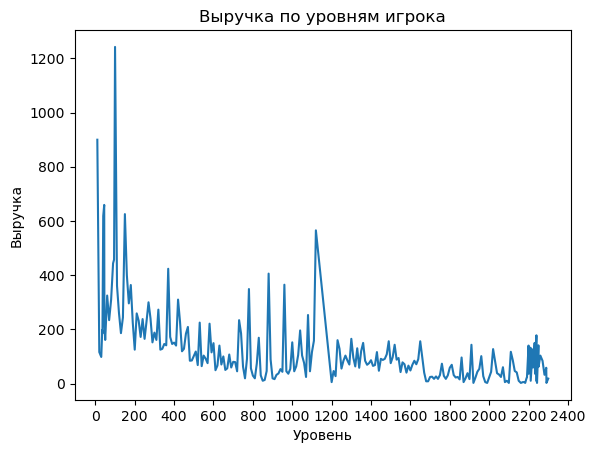

In [481]:
#---В таблице есть незначительное количество игроков с уровнем -1. Предположим (но обязательно посоветуемся с коллегами),
#что это баг и уберем их
df_lvl = joined_revenue[joined_revenue.lvl != -1]

#Сгруппируем выручку по уровням игрока
df_revenue_lvl = df_lvl.groupby(['lvl']).agg({'revenue': ['sum']}, inplace=True)
df_revenue_lvl.sort_values(by='lvl', ascending = True, inplace=True)

df_revenue_lvl.reset_index(inplace=True)

#Посмотрим какие уровни -максимальный, минимальный, средний, медианный есть в нашей выборке
print(round(df_revenue_lvl.iloc[0:,0].agg(['max','min','mean','median']),1))

#Визуализируем
df_revenue_lvl.plot(x='lvl',y='revenue', legend = False)
plt.locator_params(axis='x', nbins= 15)
plt.title("Выручка по уровням игрока")
plt.xlabel("Уровень")
plt.ylabel("Выручка")

#--------------------ИТОГ 2-------------------------------------
#Наибольшую выручку после релиза принесли игроки с уровнем 0-200 и 1000-1200


Полная конверсия из событий в игре в покупку 0.96 %


Text(1, 15, 'Полная конверсия из событий в игре в покупку 0.96 %')

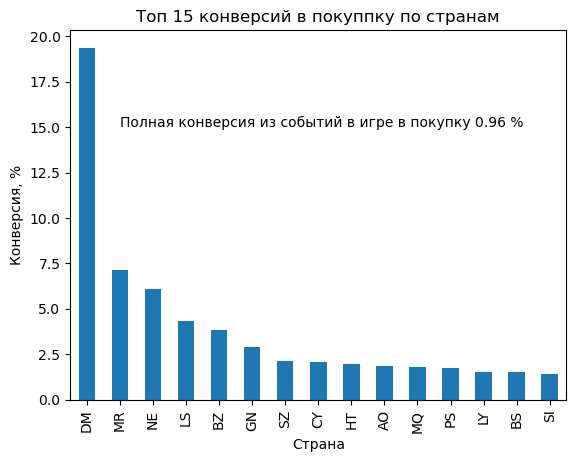

In [482]:
#Посчитаем полную конверсию из событий в игре в покупку. То есть длина фрейма с платежами 
#отнесеная к длине фрейма с событиями
conv_total = round(len(df_payments)/len(df_logins) *100,2)
s_conv_tot = 'Полная конверсия из событий в игре в покупку ' + str(conv_total) + ' %'
print(s_conv_tot)
#Посчитаем конверсию из событий в игре в покупку по странам. Посчитаем сколько всего событий и сколько всего покупок
df_payed_countries = joined_revenue.groupby(['country']).agg({'user_id': ['count']}, inplace=True)
df_event_countries = df_logins.groupby(['country']).agg({'user_id': ['count']}, inplace=True)
df_payed_countries.rename(columns = {'count':'count_1'}, inplace = True )
df_event_countries.rename(columns = {'count':'count_0'}, inplace = True )

#Соединим две агрегированные таблицы
conv_countries = pd.concat([df_payed_countries, df_event_countries],axis=1)

#Посчитаем конверсию по странам
conv_countries['Conversion'] = conv_countries['user_id']['count_1']/conv_countries['user_id']['count_0'] * 100

conv_countries.dropna(inplace = True)

conv_countries.sort_values(by=('Conversion'), ascending = False, inplace=True)
conv_countries = conv_countries.head(15)

conv_countries.plot.bar(y='Conversion',legend = False)
plt.title("Топ 15 конверсий в покуппку по странам")
plt.xlabel("Страна")
plt.ylabel("Конверсия, %")
plt.text (1, 15, s_conv_tot)

#----Итог 3------------------------------------------
# Наибольшая конверсия по странам наблюдается в DM, MR, NE

Text(0, 0.5, 'Конверсия, %')

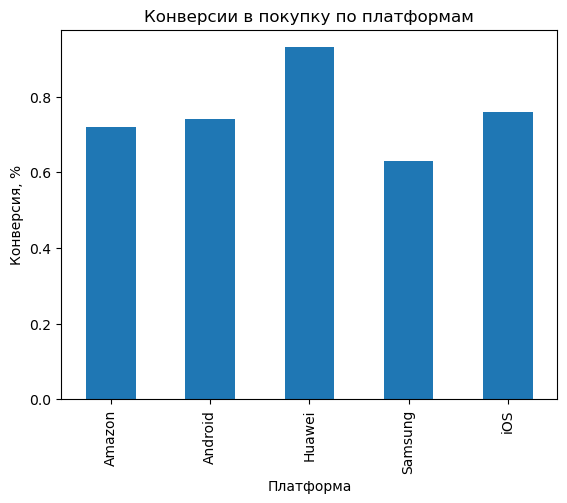

In [483]:
#Посчитаем конверсию из событий в игре в покупку по платформам
df_payed_platforms = joined_revenue.groupby(['platform']).agg({'user_id': ['count']}, inplace=True)
df_event_platforms = df_logins.groupby(['platform']).agg({'user_id': ['count']}, inplace=True)
df_payed_platforms.rename(columns = {'count':'count_1'}, inplace = True )
df_event_platforms.rename(columns = {'count':'count_0'}, inplace = True )

conv_plarforms = pd.concat([df_payed_platforms, df_event_platforms],axis=1)

conv_plarforms['Conversion'] = round(conv_plarforms['user_id']['count_1']/conv_plarforms['user_id']['count_0'] * 100, 2)



conv_plarforms.plot.bar(y='Conversion',legend = False)
plt.title("Конверсии в покупку по платформам")
plt.xlabel("Платформа")
plt.ylabel("Конверсия, %")

#----Итог 4------------------------------------------
# По платформам существенной разници в конверсиях не наблюдается

Количество новых регистраций после релиза в июле возросло на 81.18 %


Text(0, 0.5, 'Количество новых пользователей')

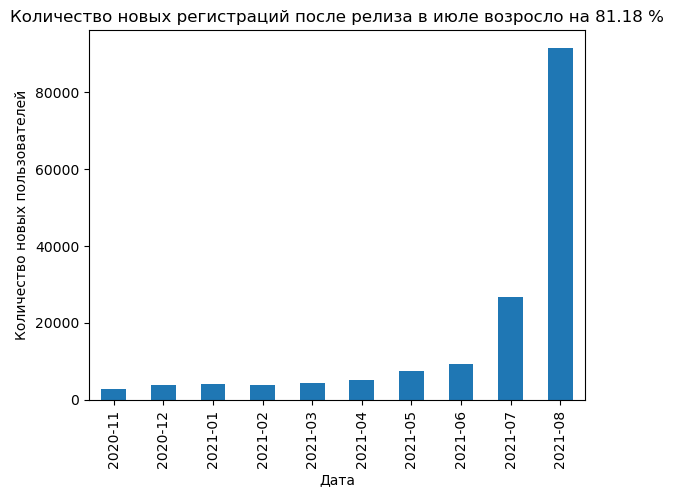

In [484]:
#Посчитаем впринципе количество новых регистраций после релиза
df_new_reg = df_logins[(df_logins.reg_date >= '2021-08-01')]
df_new_reg = df_new_reg.drop_duplicates(subset=['user_id'])
df_new_reg_by_days = df_new_reg.groupby(['reg_date']).agg({'user_id': ['count']})

#Даты обрежем до месяца для простоты визуализации
df_logins_m = df_logins.copy()
df_logins_m['reg_date'] = df_logins_m['reg_date'].dt.to_period("M")

#Уберем все дубликаты, т.к дата регистрации только одна
df_logins_m = df_logins_m.drop_duplicates(subset=['user_id'])

#Сгруппируем по дате регистрации
df_logins_m = df_logins_m.groupby(['reg_date']).agg({'user_id': ['count']}, inplace=True)

#Посчитаем, сколько регистраций было до релиза, а сколько после
N_old = (df_logins_m.loc[:'2021-07']).sum()
N_new = (df_logins_m.loc['2021-08']).sum()

new_users_growth = round((N_new/N_old*100)['user_id', 'count'],2)

s_new_users = 'Количество новых регистраций после релиза в июле возросло на ' + str(new_users_growth) + ' %' 

print(s_new_users)

df_logins_m = df_logins_m.tail(10)


#Визуализируем
df_logins_m.plot.bar(legend = False)

plt.title(s_new_users)
plt.xlabel("Дата")
plt.ylabel("Количество новых пользователей")

#-----ИТОГ 4-------------------------------------------
#Количество новых регистраций после релиза в июле возросло на 81.18 %. Это существенный показатель 
#относительно предыдущей истории регистраций

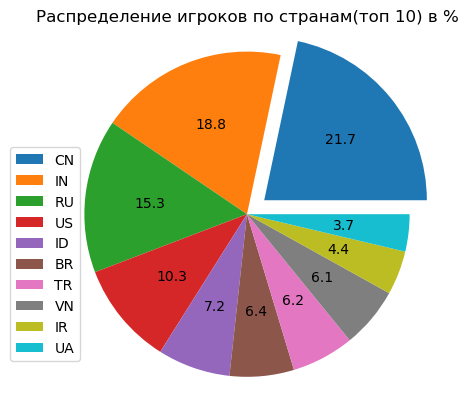

In [485]:
# Далее определим портрет пользователя
# Посчитаем в целом распределение игроков по странам
df_dist_countries = df_logins.copy()
df_dist_countries.drop_duplicates(subset=['user_id'], inplace = True)
df_dist_countries = df_dist_countries['country'].value_counts(normalize=True).mul(100).round(1)
df_dist_countries = df_dist_countries.head(10)
countries_list = []
for key, item in df_dist_countries.items():
    countries_list.append(key)

plt.title('Распределение игроков по странам(топ 10) в %')
plt.pie(
    df_dist_countries, autopct='%.1f', radius = 1.1,
    explode = [0.15] + [0 for i in range(len(df_dist_countries) - 1)])
plt.legend(
    bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
    loc = 'best', labels = countries_list)

#-----ИТОГ 5-------------------------------------------
#В основном игрок это человек из Китая, Индии, России или США

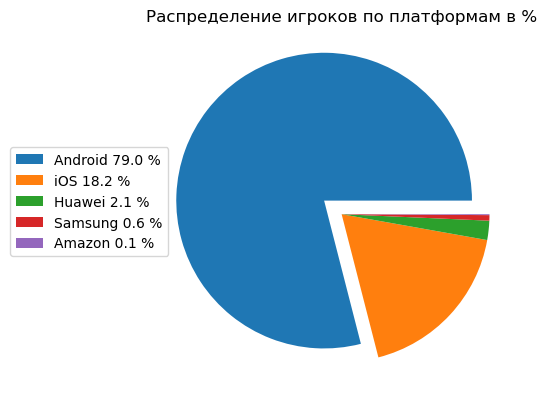

In [486]:
#Посчитаем в целом распределение игроков по устройствам
df_dist_platforms = df_logins.copy()
df_dist_platforms.drop_duplicates(subset=['user_id'], inplace = True)
df_dist_platforms = df_dist_platforms['platform'].value_counts(normalize=True).mul(100).round(1)

platform_list = []
for key, item in df_dist_platforms.items():
     platform_list.append(key + ' ' + str(item)+' %')
        
plt.title('Распределение игроков по платформам в %')
plt.pie(
    df_dist_platforms, pctdistance=1.4, radius=1,
    explode=[0.15] + [0 for _ in range(len(df_dist_platforms) - 1)] )
plt.legend(
    bbox_to_anchor = (-0.2, 0.45, 0.25, 0.25),
    loc = 'best', labels = platform_list )
#-----ИТОГ 6-------------------------------------------
#В основном игрок это пользователь Андройда

Text(0, 0.5, 'Количество')

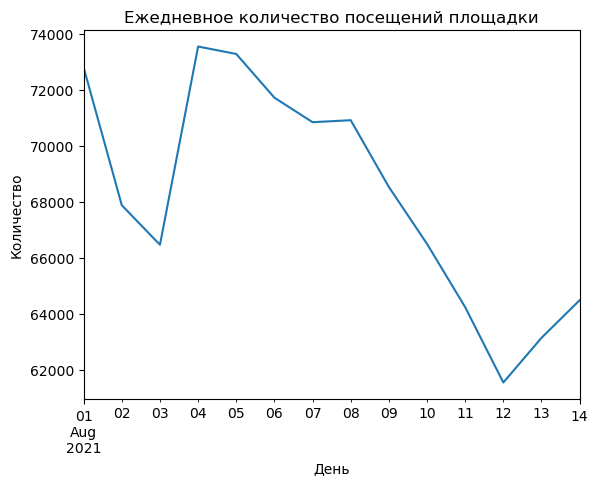

In [487]:
#Посчитаем ежедневное количество посещений площадки
df_users_daily = df_logins.copy()

df_users_daily = df_users_daily.groupby(['event_date']).agg({'user_id': ['count']}, inplace=True)


df_users_daily.plot(legend = False)
plt.title("Ежедневное количество посещений площадки")
plt.xlabel("День")
plt.ylabel("Количество")

#-----ИТОГ 7-------------------------------------------
#Количество посещений площадки держится на уровне 68000 посещений в сутки после резиза

Text(0, 0.5, 'Количество')

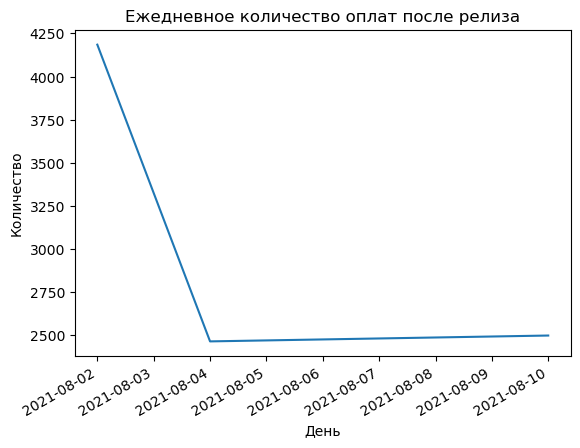

In [488]:
#Посчитаем ежедневное количество оплат после релиза

df_payments_daily = df_payments.copy()
df_payments_daily = df_payments_daily.groupby(['event_date']).agg({'user_id': ['count']}, inplace=True)


df_payments_daily.plot(legend = False)
plt.title("Ежедневное количество оплат после релиза")
plt.xlabel("День")
plt.ylabel("Количество")
#-----ИТОГ 8-------------------------------------------
#Количество оплат носит такой же характер, как и граффик суммарных оплат после резиза и падает примерно в 1,5 раза 
#на 4й день после релиза

In [489]:
#---------------ИТОГИ-----------------------
#
#После релиза в конце июля проект “чувствует” себя хорошо, резко выросло количество регистраций новых пользователей 
#(на 81.18 %). Невозможно оценить динамику выручки по сравнению с предыдущим периодом,т.к. нет данных, однако суммарно за 10 
#дней после релиза выручка составила 37394.0. Страны с наибольшей выручкой - Индия, Россия и Китай. 
#  Наибольшая выручка пришла с платформы Андройд, на втором месте IOS. 
# Из проблемных моментов следует отметить крайне низкую конверсию из посещений платбормы в покупку и выручку, которая составляет 
# менее 1 процента. 
# Для увеличения выручки и конверсии в покупку предлагается плавно поднять сложность прохождения уровней для
# пользователей из Китая, России, Индии при уровне больше 200 меньше 1000 и больше 1200
#
#